# EDA

Paso 1: Importar las librerías necesarias y cargar los datos

In [93]:
#Librerias para el EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
# Cargar los datos
streaming_ratings_df = pd.read_csv('streaming_ratings.csv')

In [95]:
print(streaming_ratings_df.columns)

Index(['type', 'title', 'director', 'cast', 'country', 'date_added', 'year',
       'rating', 'listed_in', 'description', 'platform', 'id', 'duration_int',
       'duration_type', 'scored'],
      dtype='object')


Paso 2: Limpiar los datos y seleccionar las columnas de interés

In [97]:
# Eliminar filas con valores faltantes
streaming_ratings_df.dropna(inplace=True)

Decido con que columnas voy trabajar, en este caso elijo, "scored", "platform" y "id". 

In [98]:
# Seleccionar las columnas de interés
eda_df = streaming_ratings_df[['scored', 'platform', 'id']]

Paso 3: Realizar un análisis descriptivo de las variables

In [99]:
# Mostrar estadísticas descriptivas de la variable scored
print(eda_df['scored'].describe())

count    6167.000000
mean        3.532933
std         0.056209
min         3.400000
25%         3.500000
50%         3.500000
75%         3.600000
max         3.700000
Name: scored, dtype: float64


In [100]:
# Mostrar la cantidad de valores únicos en la variable platform
print(eda_df['platform'].nunique())

3


Paso 4: Visualizar las relaciones entre las variables

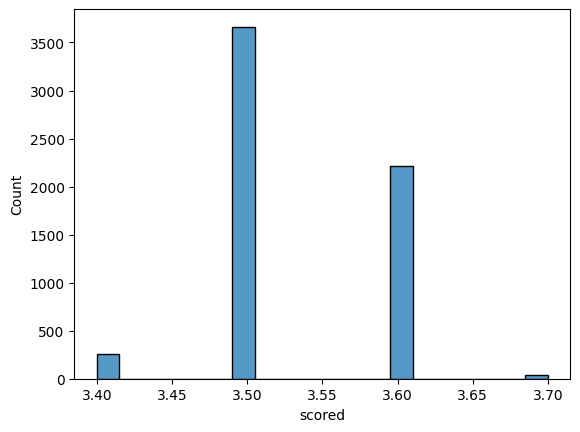

In [102]:
# Mostrar un histograma de la variable scored
sns.histplot(data=eda_df, x='scored', bins=20)
plt.show()

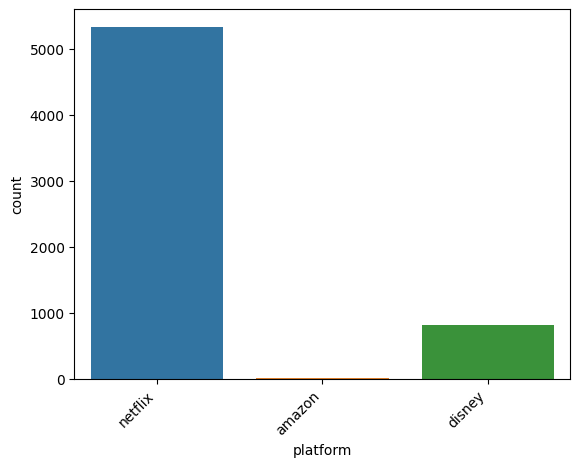

In [103]:
# Mostrar un gráfico de barras de la variable platform
sns.countplot(data=eda_df, x='platform')
plt.xticks(rotation=45, ha='right')
plt.show()

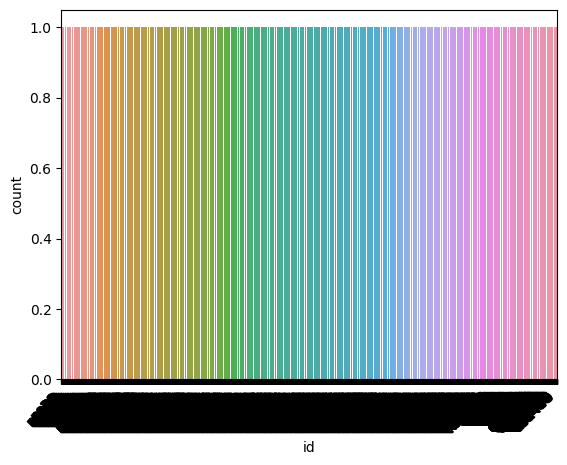

In [104]:
# Mostrar un gráfico de barras de la variable id
sns.countplot(data=eda_df, x='id')
plt.xticks(rotation=45, ha='right')
plt.show()

Paso 5: Realizar un análisis más detallado de las variables

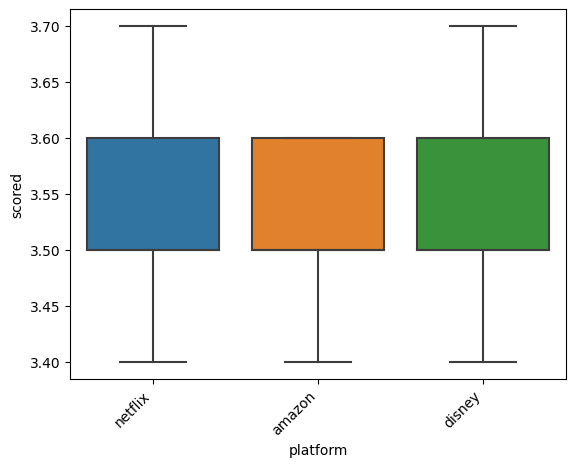

In [105]:
# Mostrar un gráfico de cajas de la variable scored por plataforma
sns.boxplot(data=eda_df, x='platform', y='scored')
plt.xticks(rotation=45, ha='right')
plt.show()

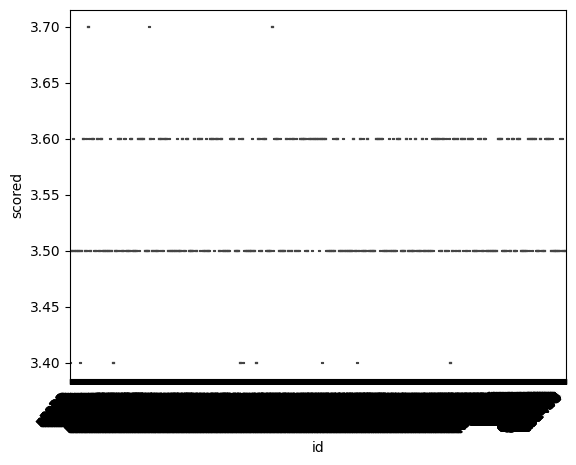

In [106]:
# Mostrar un gráfico de cajas de la variable scored por id
sns.boxplot(data=eda_df, x='id', y='scored')
plt.xticks(rotation=45, ha='right')
plt.show()

------------------------

---------------------

# Sistema de recomendación

### Importar las librerías necesarias

In [113]:
import pandas as pd
import streamlit as st
from surprise import Dataset, Reader
from surprise import SVD
from surprise.model_selection import train_test_split

### Manejo de datos y preprocesamiento

In [114]:
# Cargar los datos
streaming_ratings_df = pd.read_csv('streaming_ratings.csv')

In [115]:
print(streaming_ratings_df.columns)

Index(['type', 'title', 'director', 'cast', 'country', 'date_added', 'year',
       'rating', 'listed_in', 'description', 'platform', 'id', 'duration_int',
       'duration_type', 'scored'],
      dtype='object')


Eliminamos todas las filas con valores faltantes:

In [116]:
# Preprocesamiento de datos
streaming_ratings_df = streaming_ratings_df.dropna()

Seleccionamos las columnas que vamos a utilizar en nuestro modelo:

In [117]:
streaming_ratings_df = streaming_ratings_df[['id', 'title', 'scored']]

In [118]:
print(streaming_ratings_df.columns)

Index(['id', 'title', 'scored'], dtype='object')


### Creación del objeto Reader y Dataset

La clase Reader se utiliza para especificar el rango de valores de la variable objetivo, en este caso, la calificación dada a la película por el usuario.

    Debemos preparar los datos en el formato requerido por la biblioteca Surprise. Esto significa crear un objeto Reader y utilizarlo para cargar los datos en un objeto Dataset.

In [119]:

# Crear un objeto Reader
reader = Reader(rating_scale=(1, 5))

# Crear un objeto Dataset
data = Dataset.load_from_df(streaming_ratings_df, reader)

### División de los datos en conjuntos de entrenamiento y prueba

Dividimos nuestros datos en conjuntos de entrenamiento y prueba. Utilizaremos un 20% de los datos para el conjunto de prueba y fijamos una semilla aleatoria para asegurarnos de que la división sea reproducible.

In [120]:
from surprise.model_selection import train_test_split

In [121]:
# Dividir los datos en conjunto de entrenamiento y prueba
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

### Entrenamiento del modelo

Entrenamos nuestro modelo utilizando el algoritmo de factorización de matrices de Singular Value Decomposition (SVD) con la librería Surprise (En este caso, estamos utilizando 100 factores latentes y 20 épocas de entrenamiento. Estos son hiperparámetros que pueden ajustarse para obtener mejores resultados en el modelo).

In [122]:
from surprise import SVD

# Entrenar el modelo
model = SVD(n_factors=100, n_epochs=20, random_state=42)
model.fit(trainset)
print("Modelo entrenado correctamente.")

Modelo entrenado correctamente.


### Evaluación del modelo

Realizamos una prediccion para ver si funciona nuestro modelo

In [123]:
# Realizar predicciones
id = 1
title = 'The Dark Knight'
prediction = model.predict(id, title)
print(prediction.est)

3.533427934319887


### Implementación de la interfaz gráfica con Streamlit

Necesitamos instalar los paquetes necesarios, pip install surprise streamlit.
Implementaremos una interfaz gráfica utilizando la librería Streamlit.

In [125]:
# Crear una interfaz gráfica
import streamlit as st

In [126]:
# Crear una interfaz gráfica
st.title("Sistema de recomendación de películas")

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [127]:
# Agregar una barra lateral para ingresar el ID de usuario y el título de la película
user_id = st.sidebar.number_input('ID de usuario', min_value=1, max_value=1000, value=1, step=1)
movie_title = st.sidebar.text_input('Título de película', value='')

Ver resultados

In [130]:
# Realizar predicciones
if st.sidebar.button('Recomendar'):
    if movie_title:
        prediction = model.predict(user_id, movie_title)
        st.write(f"La calificación estimada para '{movie_title}' es: {round(prediction.est, 2)}")
    else:
        st.write("Por favor ingresa el título de la película.")